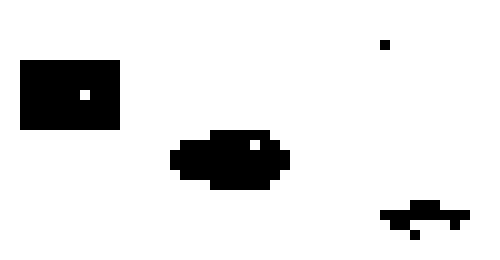

In [46]:
from PIL import Image
from IPython.display import display

img = Image.open("imagem.pbm")

img_zoom = img.resize((img.width * 10, img.height * 10), Image.NEAREST)
display(img_zoom)



In [47]:

def LerImagem(caminho):
    with open(caminho, 'r') as f:
        linhas = f.readlines()

    dados = []
    for linha in linhas:
        linha = linha.strip()
        if not linha or linha.startswith('#'):
            continue
        dados.extend(linha.split())

    if dados[0] != 'P1':
        raise ValueError("Arquivo não é PBM P1")

    largura = int(dados[1])
    altura = int(dados[2])

    pixels = list(map(int, dados[3:]))

    imagem = [] # matriz de pontos
    idx = 0
    for _ in range(altura):
        imagem.append(pixels[idx:idx + largura])
        idx += largura

    return imagem, largura, altura

imagem, largura, altura = LerImagem("imagem.pbm")
print(f"Largura: {largura}, Altura: {altura}")
for linha in imagem:
    print( linha)

Largura: 50, Altura: 26
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [48]:
def erosao(imagem, mascara):
    altura = len(imagem)
    largura = len(imagem[0])
    nova_imagem = [[0 for _ in range(largura)] for _ in range(altura)] #Inicializa com zeros uma nova imagem
    
    for y in range(1, altura - 1):
        for x in range(1, largura - 1):
            aplicar_erosao = True
            for j in range(-1, 2):
                for i in range(-1, 2):
                    if mascara[j + 1][i + 1] == 1 and imagem[y + j][x + i] == 0:
                        aplicar_erosao = False
            if aplicar_erosao:
                nova_imagem[y][x] = 1
            else:
                nova_imagem[y][x] = 0

    return nova_imagem
    


In [49]:
def zerar_ponto_irmaos(imagem, x, y, elemento_estruturante):
    imagem[y][x] = 0

    h = len(elemento_estruturante)
    w = len(elemento_estruturante[0])
    cy, cx = h // 2, w // 2 
    for j in range(h):
        for i in range(w):
            if elemento_estruturante[j][i] == 1:
                dx, dy = i - cx, j - cy
                nx, ny = x + dx, y + dy
                if 0 <= ny < len(imagem) and 0 <= nx < len(imagem[0]):
                    if imagem[ny][nx] == 1:
                        zerar_ponto_irmaos(imagem, nx, ny, elemento_estruturante)

In [50]:
figuras = []
i=0

elemento_estruturante = [[1,1,1],
                         [1,1,1],
                         [1,1,1]]

imagem_diferenca_copy = [linha[:] for linha in imagem]
for x in range(len(imagem[0])):
    for y in range(len(imagem)):
        if imagem_diferenca_copy[y][x] == 1:
            zerar_ponto_irmaos(imagem_diferenca_copy, x, y, elemento_estruturante)
            i+=1
            print(f"Figura {i} encontrada no ponto ({x}, {y})")

print(f"Número de figuras: {i}")

Figura 1 encontrada no ponto (2, 6)
Figura 2 encontrada no ponto (17, 15)
Figura 3 encontrada no ponto (38, 4)
Figura 4 encontrada no ponto (38, 21)
Número de figuras: 4
